# FTDS Complementary // Model Deployment

Sumber dataset : https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

Dataset tersebut terdiri dari data penempatan siswa di kampus XYZ. Mencakup secondary dan higher secondary school percentage dan specialization. Ini juga mencakup degree specialization, type dan work experience, dan tawaran salary kepada siswa yang ditempatkan.

# Importing Libraries

notes : Profiling ini bersifat opsional. Di sini profiling digunakan untuk memudahkan analisa.

Jika tidak menggunakan profiling, skip bagian : report = data.profile_report(title="Campus Placement Data - Report", progress_bar=False)

In [ ]:
# !pip install pandas_profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [2]:
data = pd.read_csv('Placement_Data_Full_Class.csv')

# remove serial number
data.drop('sl_no', axis=1, inplace=True)

# Examining Dataset

In [3]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Inference :
* We have Gender and Educational qualification data
* We have all the educational performance (score) data
* We have the status of placement and salary details
* We can expect null values in salary as candidates who weren't placed would have no salary
* Status of placement is our target variable. Rest of them are independent variable except salary

In [4]:
print('The shape of the data is (row, column):', str(data.shape))
print(data.info())

The shape of the data is (row, column): (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [5]:
report = data.profile_report(title="Campus Placement Data - Report", progress_bar=False)
report

# uncomment syntax below to make new html file
# report.to_file(output_file='output.html')

* 67 missing values in Salary for student who didn't get placed. NaN Value need to be filled
* Data is not scaled. Salary column ranges from 200k-940k, rest of numerical columns are percentages
* 300k at 75th percentile goes all the way up to 940k max, in Salary (high skewness). Thus, outliers at high salary end

# Data Cleaning/handling missing values

In [6]:
data.salary.fillna(value=0, inplace=True)
print('Salary column with null values: ', data.salary.isnull().sum(), sep='\n')

Salary column with null values: 
0


# Exploring Data by each features (optional)

In [7]:
"""
Feature : Gender
Does gender affect placements?
"""
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

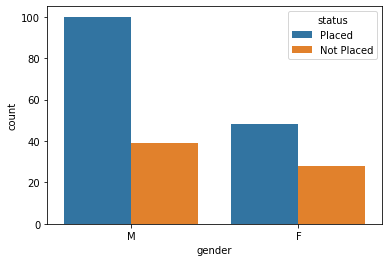

In [9]:
sns.countplot(x='gender', hue='status', data=data)
plt.show()

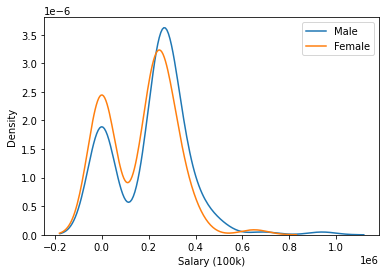

In [10]:
sns.kdeplot(data.salary[data.gender=='M'])
sns.kdeplot(data.salary[data.gender=='F'])
plt.legend(['Male', 'Female'])
plt.xlabel('Salary (100k)')
plt.show()

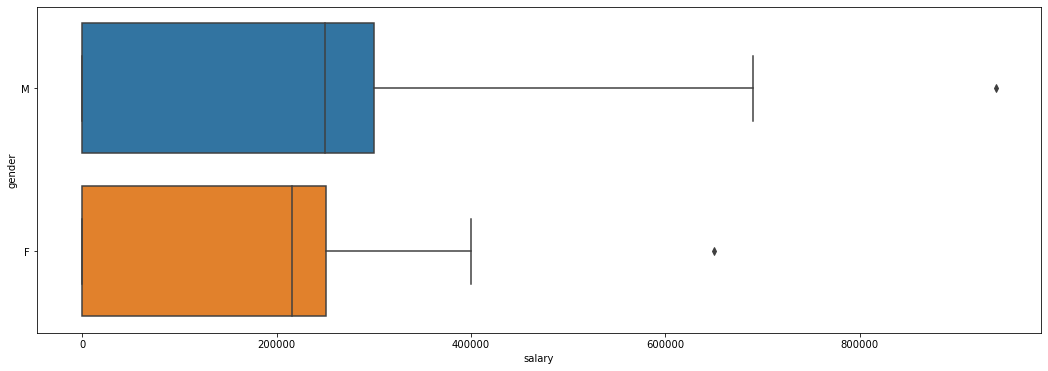

In [14]:
plt.figure(figsize=(18,6))
sns.boxplot(x='salary', y='gender', data=data)
plt.show()

Insights :
* We have samples of 139 Male students and 76 Female students
* 30 female and 40 Male students are not placed. Male students have comparatively higher placements
* Male students are offered slightly greater salary than female on an average

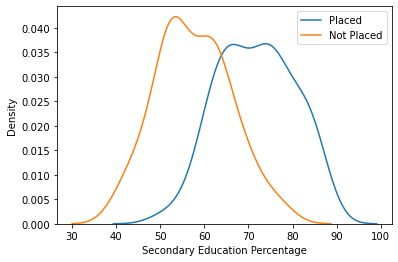

In [15]:
"""
feature: ssc_p (Secondary Education percentage), ssc_b (Board of Education)
Does Secondary Education affect placements?
"""
sns.kdeplot(data.ssc_p[data.status=='Placed'])
sns.kdeplot(data.ssc_p[data.status=='Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel('Secondary Education Percentage')
plt.show()

* All students with Secondary Education Percentage above 90% are placed
* All students with secondary Education Percentage below 50% are not-placed
* Students with good Secondary Education percentage are placed on average

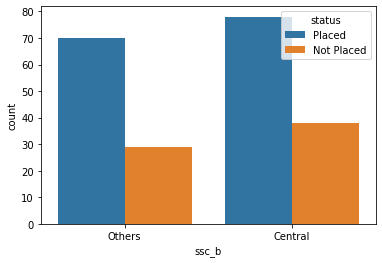

In [17]:
sns.countplot(x='ssc_b', hue='status', data=data)
plt.show()

Board of Education tidak banyak mempengaruhi Placement Status

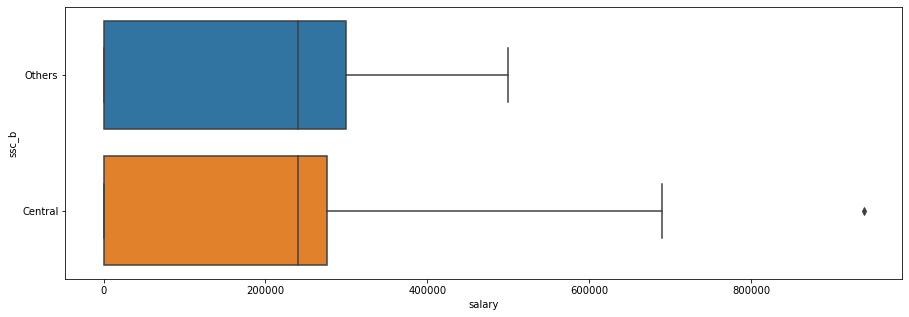

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(x='salary', y='ssc_b', data=data)
plt.show()

Outliers terdapat pada ke-duanya, tetapi siswa dari Central Board mendapatkan pekerjaan bergaji tinggi

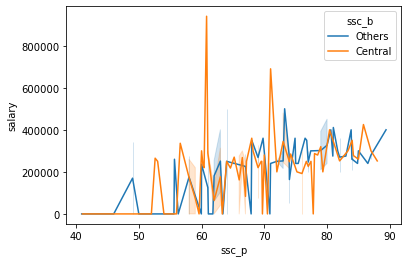

In [19]:
sns.lineplot(x='ssc_p', y='salary', hue='ssc_b' ,data=data)
plt.show()

Tidak ada pola khusus (correlation) antara Secondary Education Percentage dan Salary. Board of Education tidak mempengaruhi Salary.

Kita dapat membuat grafik sendiri dari sini : (?)

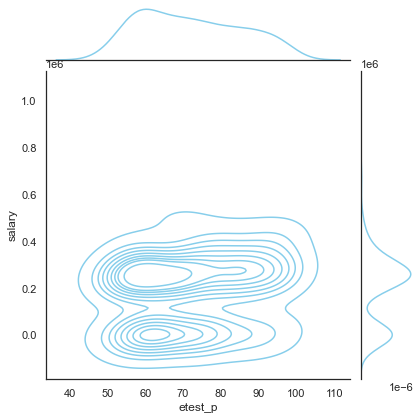

In [20]:
sns.set(rc={'figure.figsize':(15,5)})
sns.set(style='white', color_codes=True)
sns.jointplot(x='etest_p', y='salary', data=data, kind='kde', color='skyblue')
plt.show()

* Most of the candidates scored around 60 percentage got a decent package of around 3 lakhs PA
* Not many condidates received salary more than 4 lakhs PA
* The bottom dense part shows the candidates who were not placed

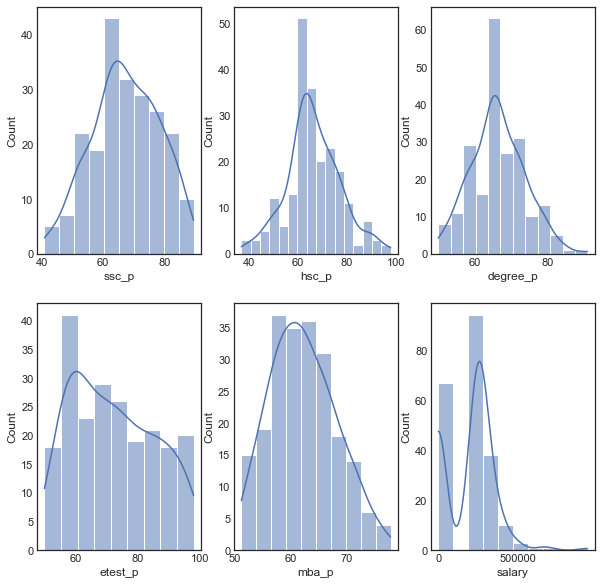

In [27]:
plt.figure(figsize=(20,8))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.histplot(data.ssc_p, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(232)
sns.histplot(data.hsc_p, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(233)
sns.histplot(data.degree_p, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(234)
sns.histplot(data.etest_p, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(235)
sns.histplot(data.mba_p, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

plt.subplot(236)
sns.histplot(data.salary, kde=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)

* All the distributions follow normal distribution except salary feature
* Most of the candidates edicational performances are between 60-80%
* Salary distribution got outlers where few have got salary of 7.5L and 10L PA

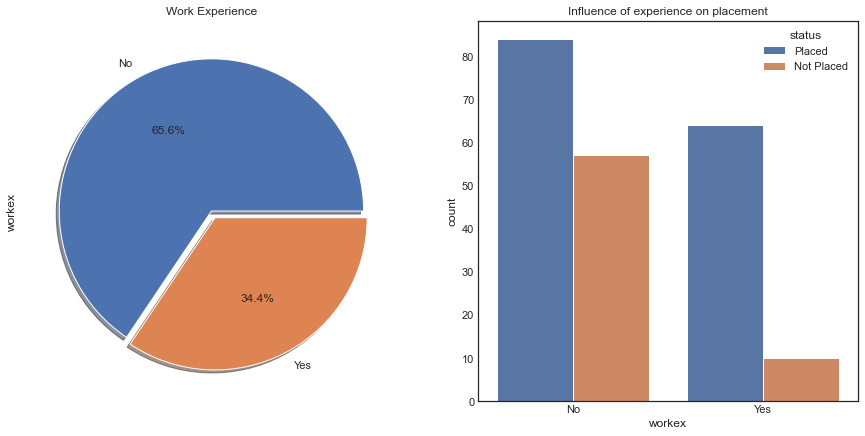

In [31]:
plt.style.use('seaborn-white')
f,ax = plt.subplots(1,2, figsize=(15,7))
data.workex.value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work Experience')
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title('Influence of experience on placement')
plt.show()

* We have nearly 66.2% of candidates who never had any work experience
* Candidates who never had work experience have got hired more than the ones who had experience
* We can conclude that work experience doesn't influence a candidate in the recruitment process

# Preprocessing data for classification models

In [33]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [34]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [35]:
# separating features and target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [36]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [37]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score :  0.8923076923076924
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        20
           1       0.90      0.96      0.92        45

    accuracy                           0.89        65
   macro avg       0.89      0.85      0.87        65
weighted avg       0.89      0.89      0.89        65



In [39]:
# Logistic Regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print('Accuracy score : ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy score :  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



# Getting Ready for deployment